In [ ]:
"""
Citation:
Title: Python_BusinessAnalytics_DecisionTrees.ipynb
Source: https://colab.research.google.com/drive/10aOYercpcwMVVGbnGMsRI9P76KM300T4?usp=sharing#scrollTo=Y_0cpFmMqJeB
Accessed on: 09/01/2023
"""

In [ ]:
"""
This project makes use of OpenAI's ChatGPT for academic purpose.

Reference:
OpenAI. (2023). ChatGPT. https://www.openai.com/
Accessed on: 09/01/2023
"""

In [1]:
# set up 
from __future__ import division, print_function, unicode_literals
import numpy as np 
import scipy as sp 
import pandas as pd
np.random.seed(42)
import matplotlib                   
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['axes.labelsize'] = 14  
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12


In [2]:
# import data 
df=pd.read_csv("C:\\Users\\chenl\\Downloads\\HW1_Data.csv")

In [3]:
#clean data 
negative_revenue = df[df['revenue'] < 0]
print(negative_revenue)
negative_eqpdays=df[df['eqpdays'] < 0]
print(negative_eqpdays)
# Removing rows where 'revenue' is negative
df = df[df['revenue'] >= 0]

# Removing rows where 'eqpdays' is negative
df = df[df['eqpdays'] >= 0]

       revenue  outcalls  incalls  months  eqpdays  webcap  marryyes  travel  \
20289    -5.86       0.0      0.0      15      452       1         1       0   

       pcown  creditcd  retcalls  churndep  
20289      0         0         0         0  
       revenue  outcalls  incalls  months  eqpdays  webcap  marryyes  travel  \
102      95.49     13.67     3.00      16       -2       1         0       0   
2190     58.43     62.00     6.67       9       -1       1         1       0   
2207     69.67      2.00     0.33      12       -3       1         0       0   
2982     68.98      0.00     0.00      20       -2       1         1       0   
3359     74.98      0.00     0.00      24       -1       1         1       0   
13781    83.66     30.67     4.67      11       -1       1         0       0   
13926   173.28     29.00     7.00      21       -2       1         0       0   
14019    90.26    201.67    57.33      17       -2       0         0       0   
14145   105.45     51.33     

In [5]:
feature_name=['revenue', 'outcalls', 'incalls', 'months', 'eqpdays', 'webcap',
              'marryyes', 'travel', 'pcown', 'creditcd', 'retcalls'] # attribution columns 
X=df[feature_name] # attribute values 
y=df.churndep # target values 
# Exploring Target Variable
# np.unique finds the unique elements of an array and returns their counts
unique, counts = np.unique(y, return_counts=True) # 2 distinct classes equally represented
print("The frequency of instances per class is: " , dict(zip(unique, counts))) 
unique_churndep = np.unique(df['churndep'])                                                                               
print("The names of the three distinct classes are: ", list(unique_churndep)) 

The frequency of instances per class is:  {0: 16006, 1: 15838}
The names of the three distinct classes are:  [0, 1]


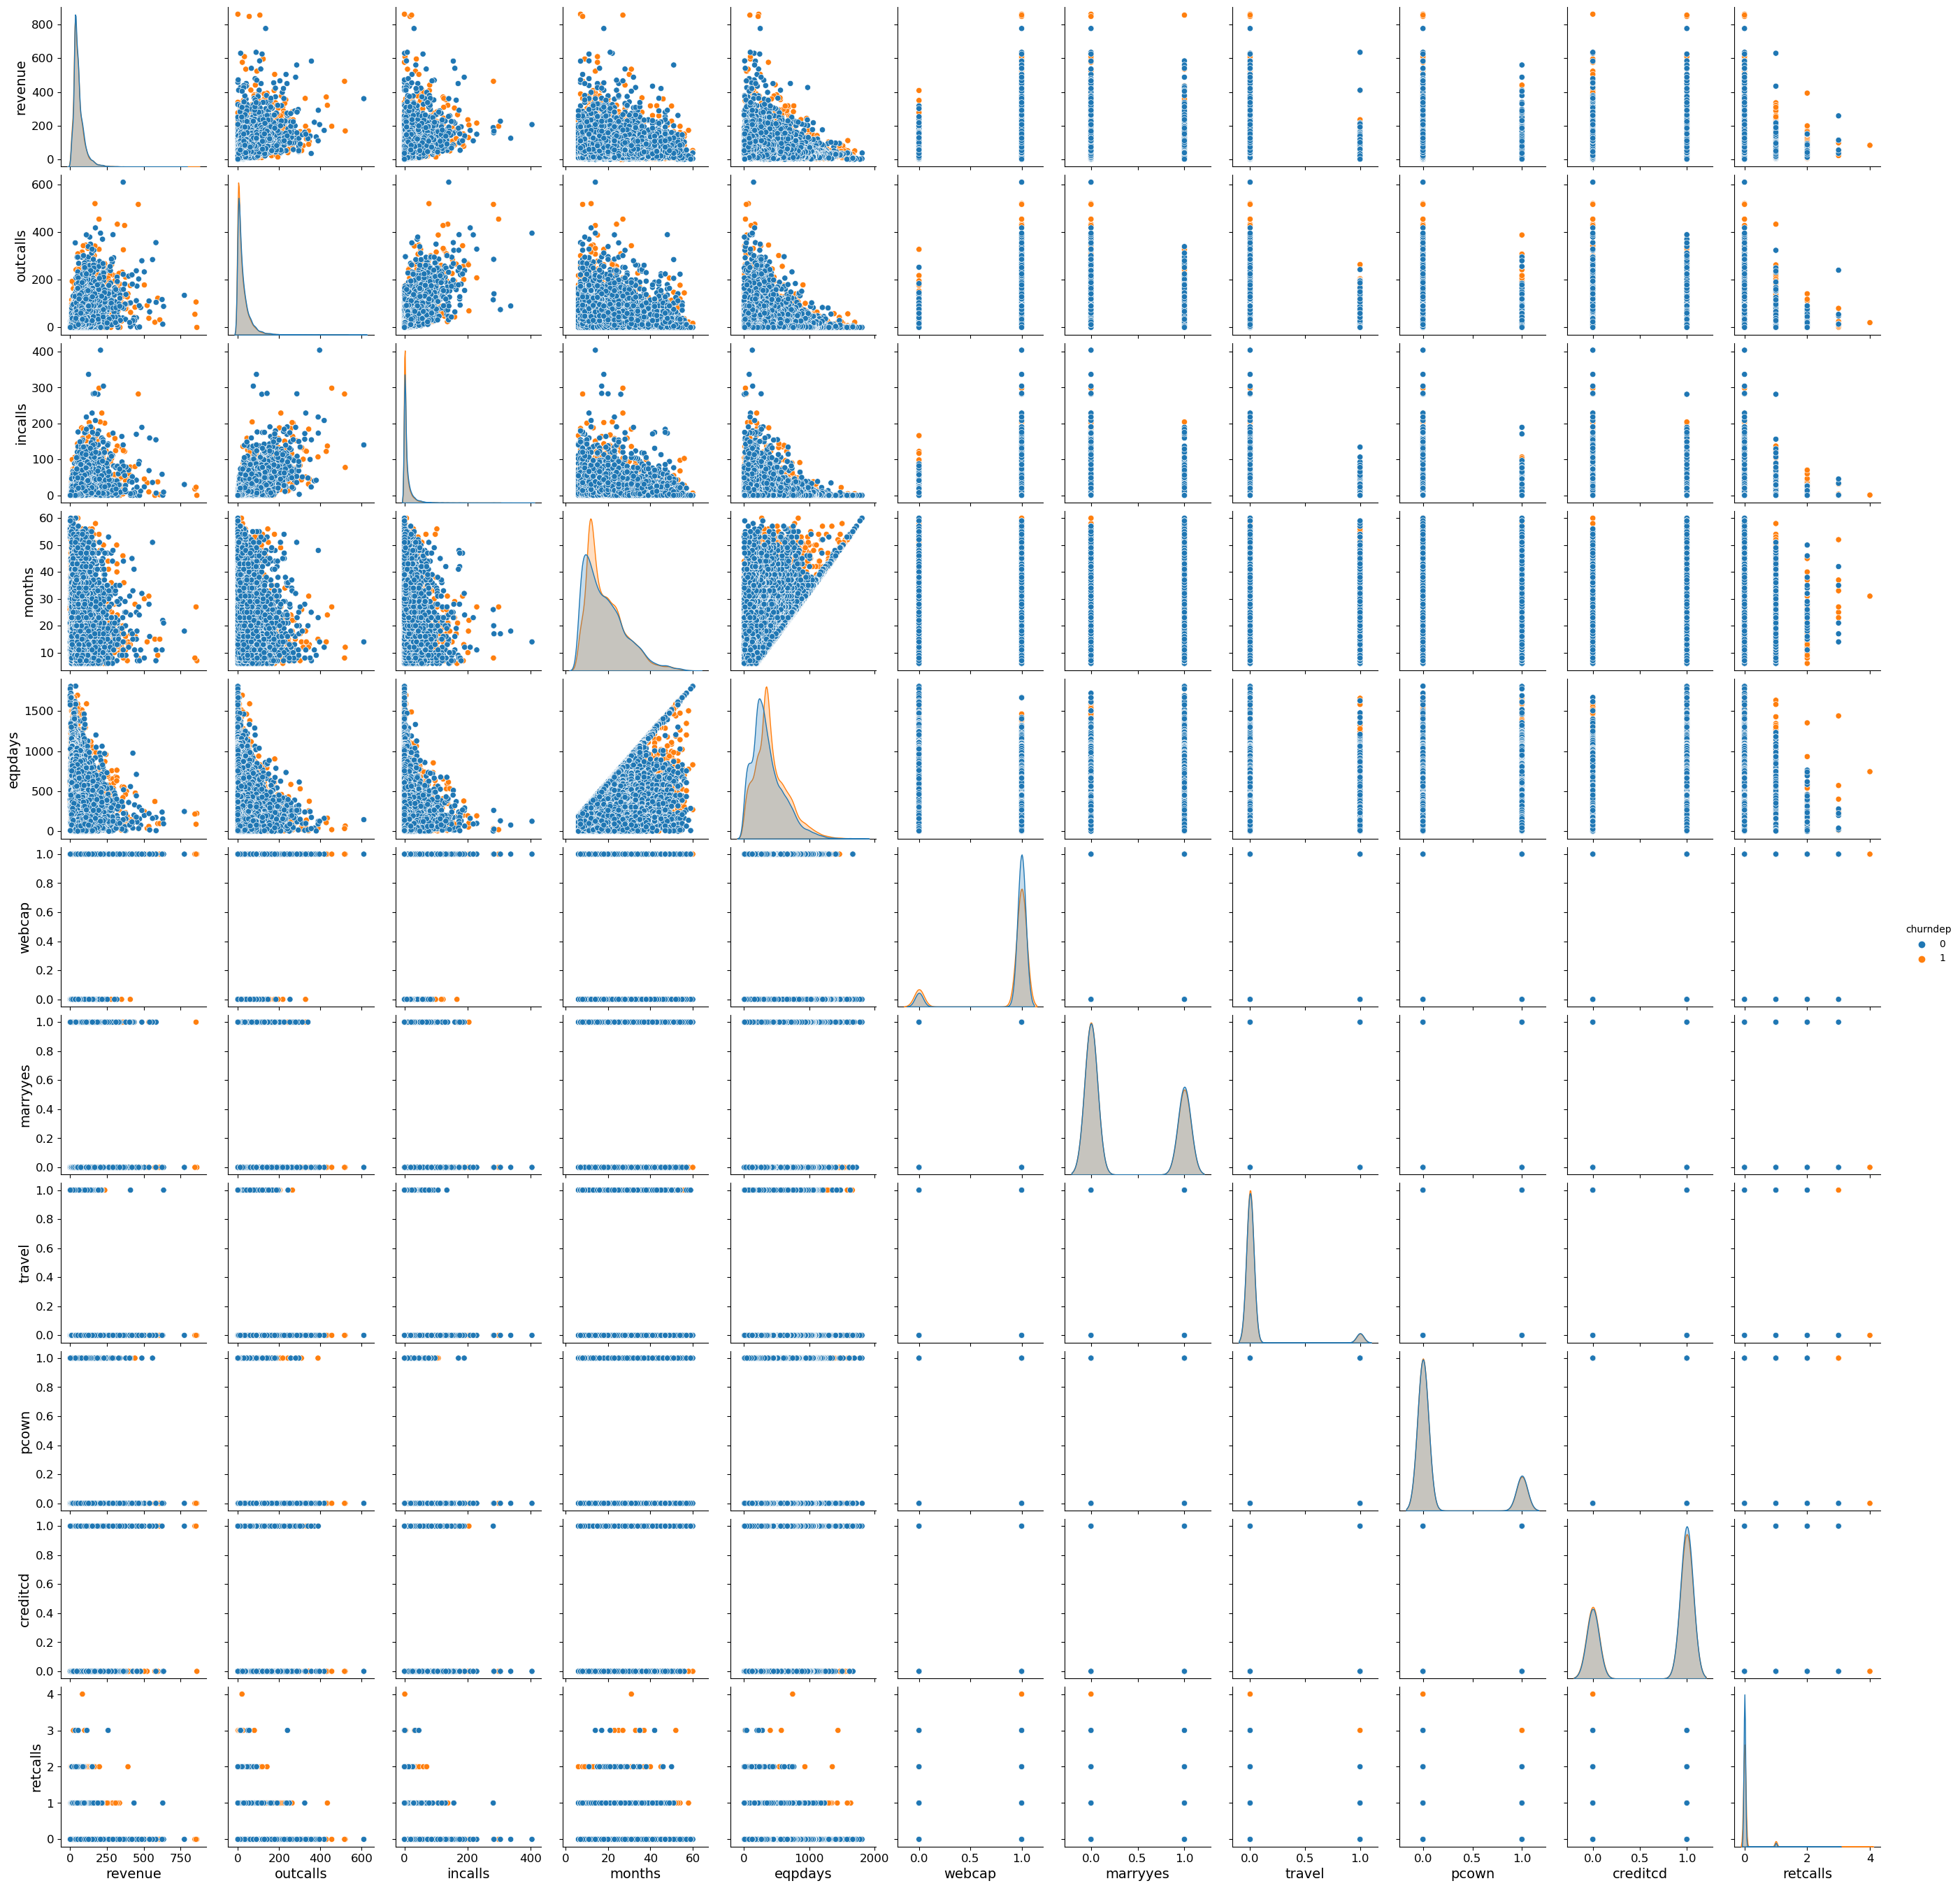

In [6]:
import seaborn as sns

sns.pairplot(df, hue='churndep')

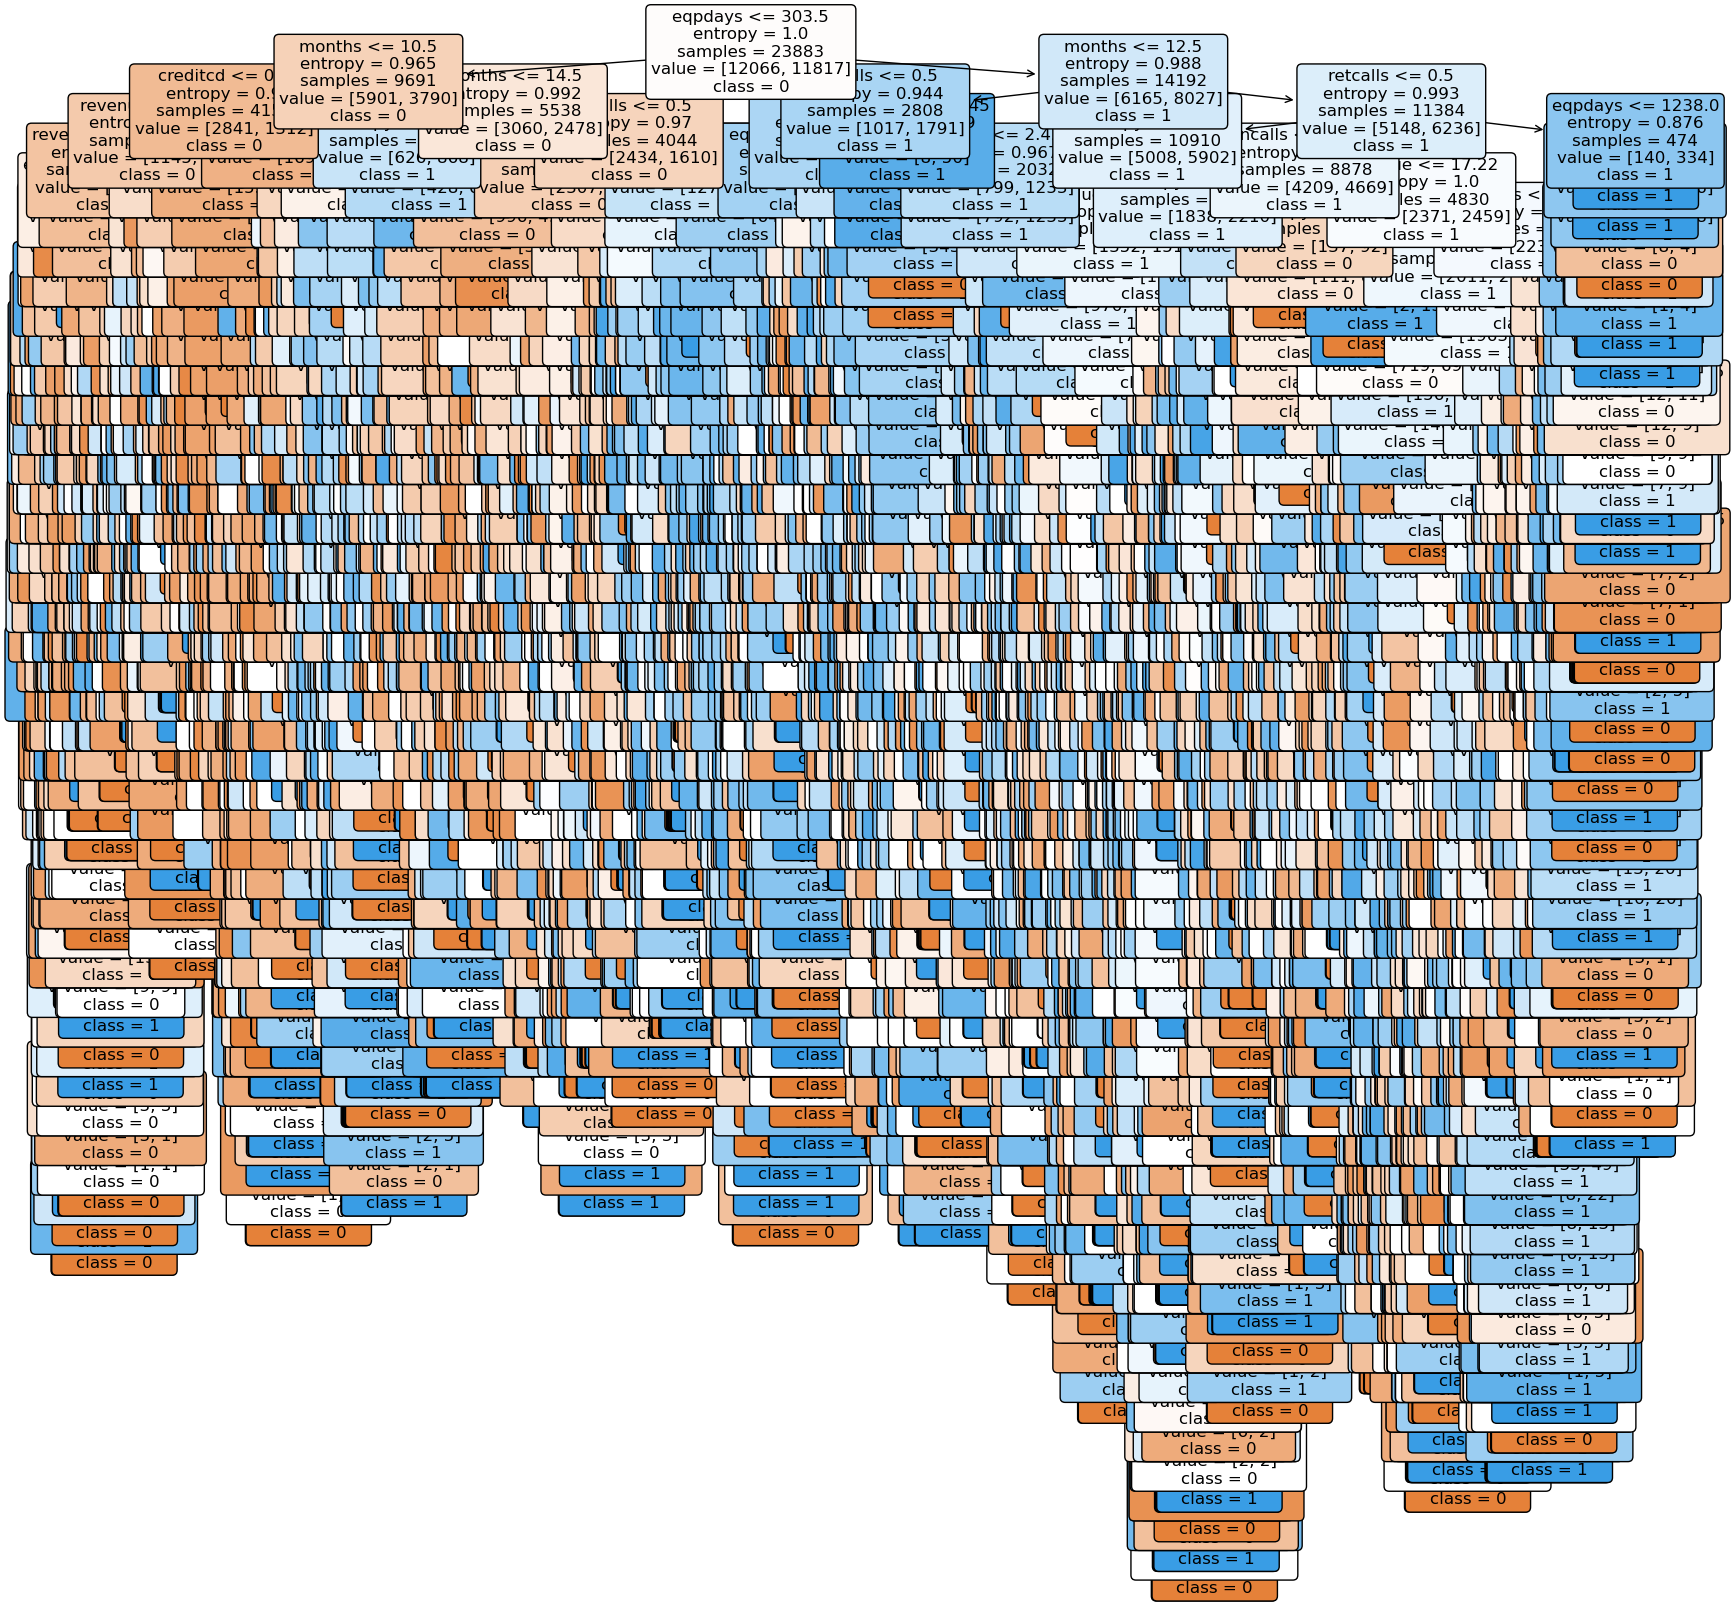

In [8]:
#Part A 
# Build a decision tree with entropy and no max_depth 
# Imports
from sklearn.metrics import confusion_matrix           
import itertools                                       
from sklearn.model_selection import train_test_split   
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Split the Data 
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X,        
                                                    y,
                                                    random_state=42)   

# Build the decision tree model
# Initialize classifier
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=42)

# Visualization of the Decision Tree 
# Import required modules for visualization
import matplotlib.pyplot as plt
from sklearn import tree

feature_names = X_train.columns.tolist()

plt.figure(figsize=(20,20))                       
tree.plot_tree(clf.fit(X_train, y_train),         
               feature_names = feature_names, 
               filled = True,                      
                                                   
               #class_names = str(y_train.unique()),   
               class_names=y_train.unique().astype(str).tolist(),
               
               rounded = True,                     
               fontsize=12)                        

# Print the string 'Decision Tree Visualization' to the console
#print('Decision Tree Visualization')
plt.show()



In [9]:
# Part b 
# Explore how well the decision trees perform for several different parameter values (e.g., for different splitting criteria).

# import
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
import itertools 


In [11]:
# Initialize lists to store results
all_results = []
test_sizes = [i/10 for i in range(2,5)]
max_depths = list(range(2, 10))
criteria = ["entropy", "gini"]
            
for test in test_sizes:
    for max_depth in max_depths:
        for criterion in criteria: 
            
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=42)

            clf1 = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=42)
            clf1 = clf1.fit(X_train, y_train)
            y_predict = clf1.predict(X_test)

            accuracy = accuracy_score(y_test, y_predict)
            precision = precision_score(y_test, y_predict)
            recall=recall_score(y_test,y_predict)
            f1=f1_score(y_test,y_predict)
            
            # Append results to the list
            all_results.append({
                'Test Size': test,
                'Max Depth': max_depth,
                'Criterion' : criterion,
                'Accuracy': accuracy,
                'Recall': recall,
                'Precision': precision,
                'F1-Score': f1
            })
            
# Convert results list to a DataFrame for better visualization
results_depth_df = pd.DataFrame(all_results)

results_depth_df

# Rank the results by F1-Score in descending order
ranked_results = results_depth_df.sort_values(by='F1-Score', ascending=False)

ranked_results[['Test Size', 'Max Depth', 'Accuracy','Criterion', 'Recall', 'Precision', 'F1-Score']]

Test Size  Max Depth  Accuracy Criterion    Recall  Precision  F1-Score
4         0.2          4  0.596640   entropy  0.756363   0.577351  0.654843
7         0.2          5  0.598524      gini  0.751707   0.579564  0.654506
5         0.2          4  0.596169      gini  0.755121   0.577087  0.654208
6         0.2          5  0.597896   entropy  0.749224   0.579314  0.653404
2         0.2          3  0.593971   entropy  0.754811   0.575213  0.652886
3         0.2          3  0.593971      gini  0.754811   0.575213  0.652886
22        0.3          5  0.596085   entropy  0.751400   0.576703  0.652561
23        0.3          5  0.596190      gini  0.750985   0.576843  0.652495
21        0.3          4  0.595876      gini  0.751192   0.576544  0.652381
20        0.3          4  0.595876   entropy  0.751192   0.576544  0.652381
9         0.2          6  0.598367      gini  0.738982   0.581015  0.650546
35        0.4          3  0.592793      gini  0.754926   0.571445  0.650495
34        0.4          3  0.592793   entropy  0.754926   0.571445  0.650495
36        0.4          4  0.594834   entropy  0.748671   0.573912  0.649746
37        0.4          4  0.594834      gini  0.748671   0.573912  0.649746
19        0.3          3  0.592841      gini  0.748082   0.574248  0.649739
18        0.3          3  0.592841   entropy  0.748082   0.574248  0.649739
8         0.2          6  0.596640   entropy  0.736189   0.579809  0.648708
11        0.2          7  0.598367      gini  0.729981   0.582178  0.647755
10        0.2          7  0.596954   entropy  0.728119   0.581125  0.646370
39        0.4          5  0.591773      gini  0.742571   0.571910  0.646162
24        0.3          6  0.593155   entropy  0.734398   0.576122  0.645702
38        0.4          5  0.592950   entropy  0.737879   0.573478  0.645373
40        0.4          6  0.589260   entropy  0.740851   0.569899  0.644227
26        0.3          7  0.590852   entropy  0.729836   0.574600  0.642981
25        0.3          6  0.592003      gini  0.725482   0.576157  0.642254
41        0.4          6  0.587769      gini  0.732405   0.569500  0.640761
42        0.4          7  0.592244   entropy  0.722865   0.574590  0.640255
27        0.3          7  0.589491      gini  0.722579   0.574230  0.639919
43        0.4          7  0.590595      gini  0.715671   0.573937  0.637015
28        0.3          8  0.588968   entropy  0.712212   0.574992  0.636288
31        0.3          9  0.585514      gini  0.713456   0.571690  0.634754
30        0.3          9  0.586561   entropy  0.707029   0.573398  0.633240
44        0.4          8  0.589182   entropy  0.694088   0.575243  0.629102
29        0.3          8  0.583211      gini  0.699979   0.571139  0.629029
45        0.4          8  0.588004      gini  0.690804   0.574532  0.627326
46        0.4          9  0.585728   entropy  0.692993   0.572111  0.626777
0         0.2          2  0.580782   entropy  0.677529   0.572365  0.620523
1         0.2          2  0.580782      gini  0.677529   0.572365  0.620523
17        0.3          2  0.582060      gini  0.673854   0.573192  0.619461
16        0.3          2  0.582060   entropy  0.673854   0.573192  0.619461
15        0.2          9  0.588789      gini  0.660459   0.582535  0.619055
14        0.2          9  0.589889   entropy  0.655183   0.584441  0.617793
33        0.4          2  0.582117      gini  0.671254   0.571276  0.617243
32        0.4          2  0.582117   entropy  0.671254   0.571276  0.617243
12        0.2          8  0.588946   entropy  0.650838   0.584123  0.615678
47        0.4          9  0.582823      gini  0.665468   0.572678  0.615596
13        0.2          8  0.590360      gini  0.646182   0.586314  0.614794

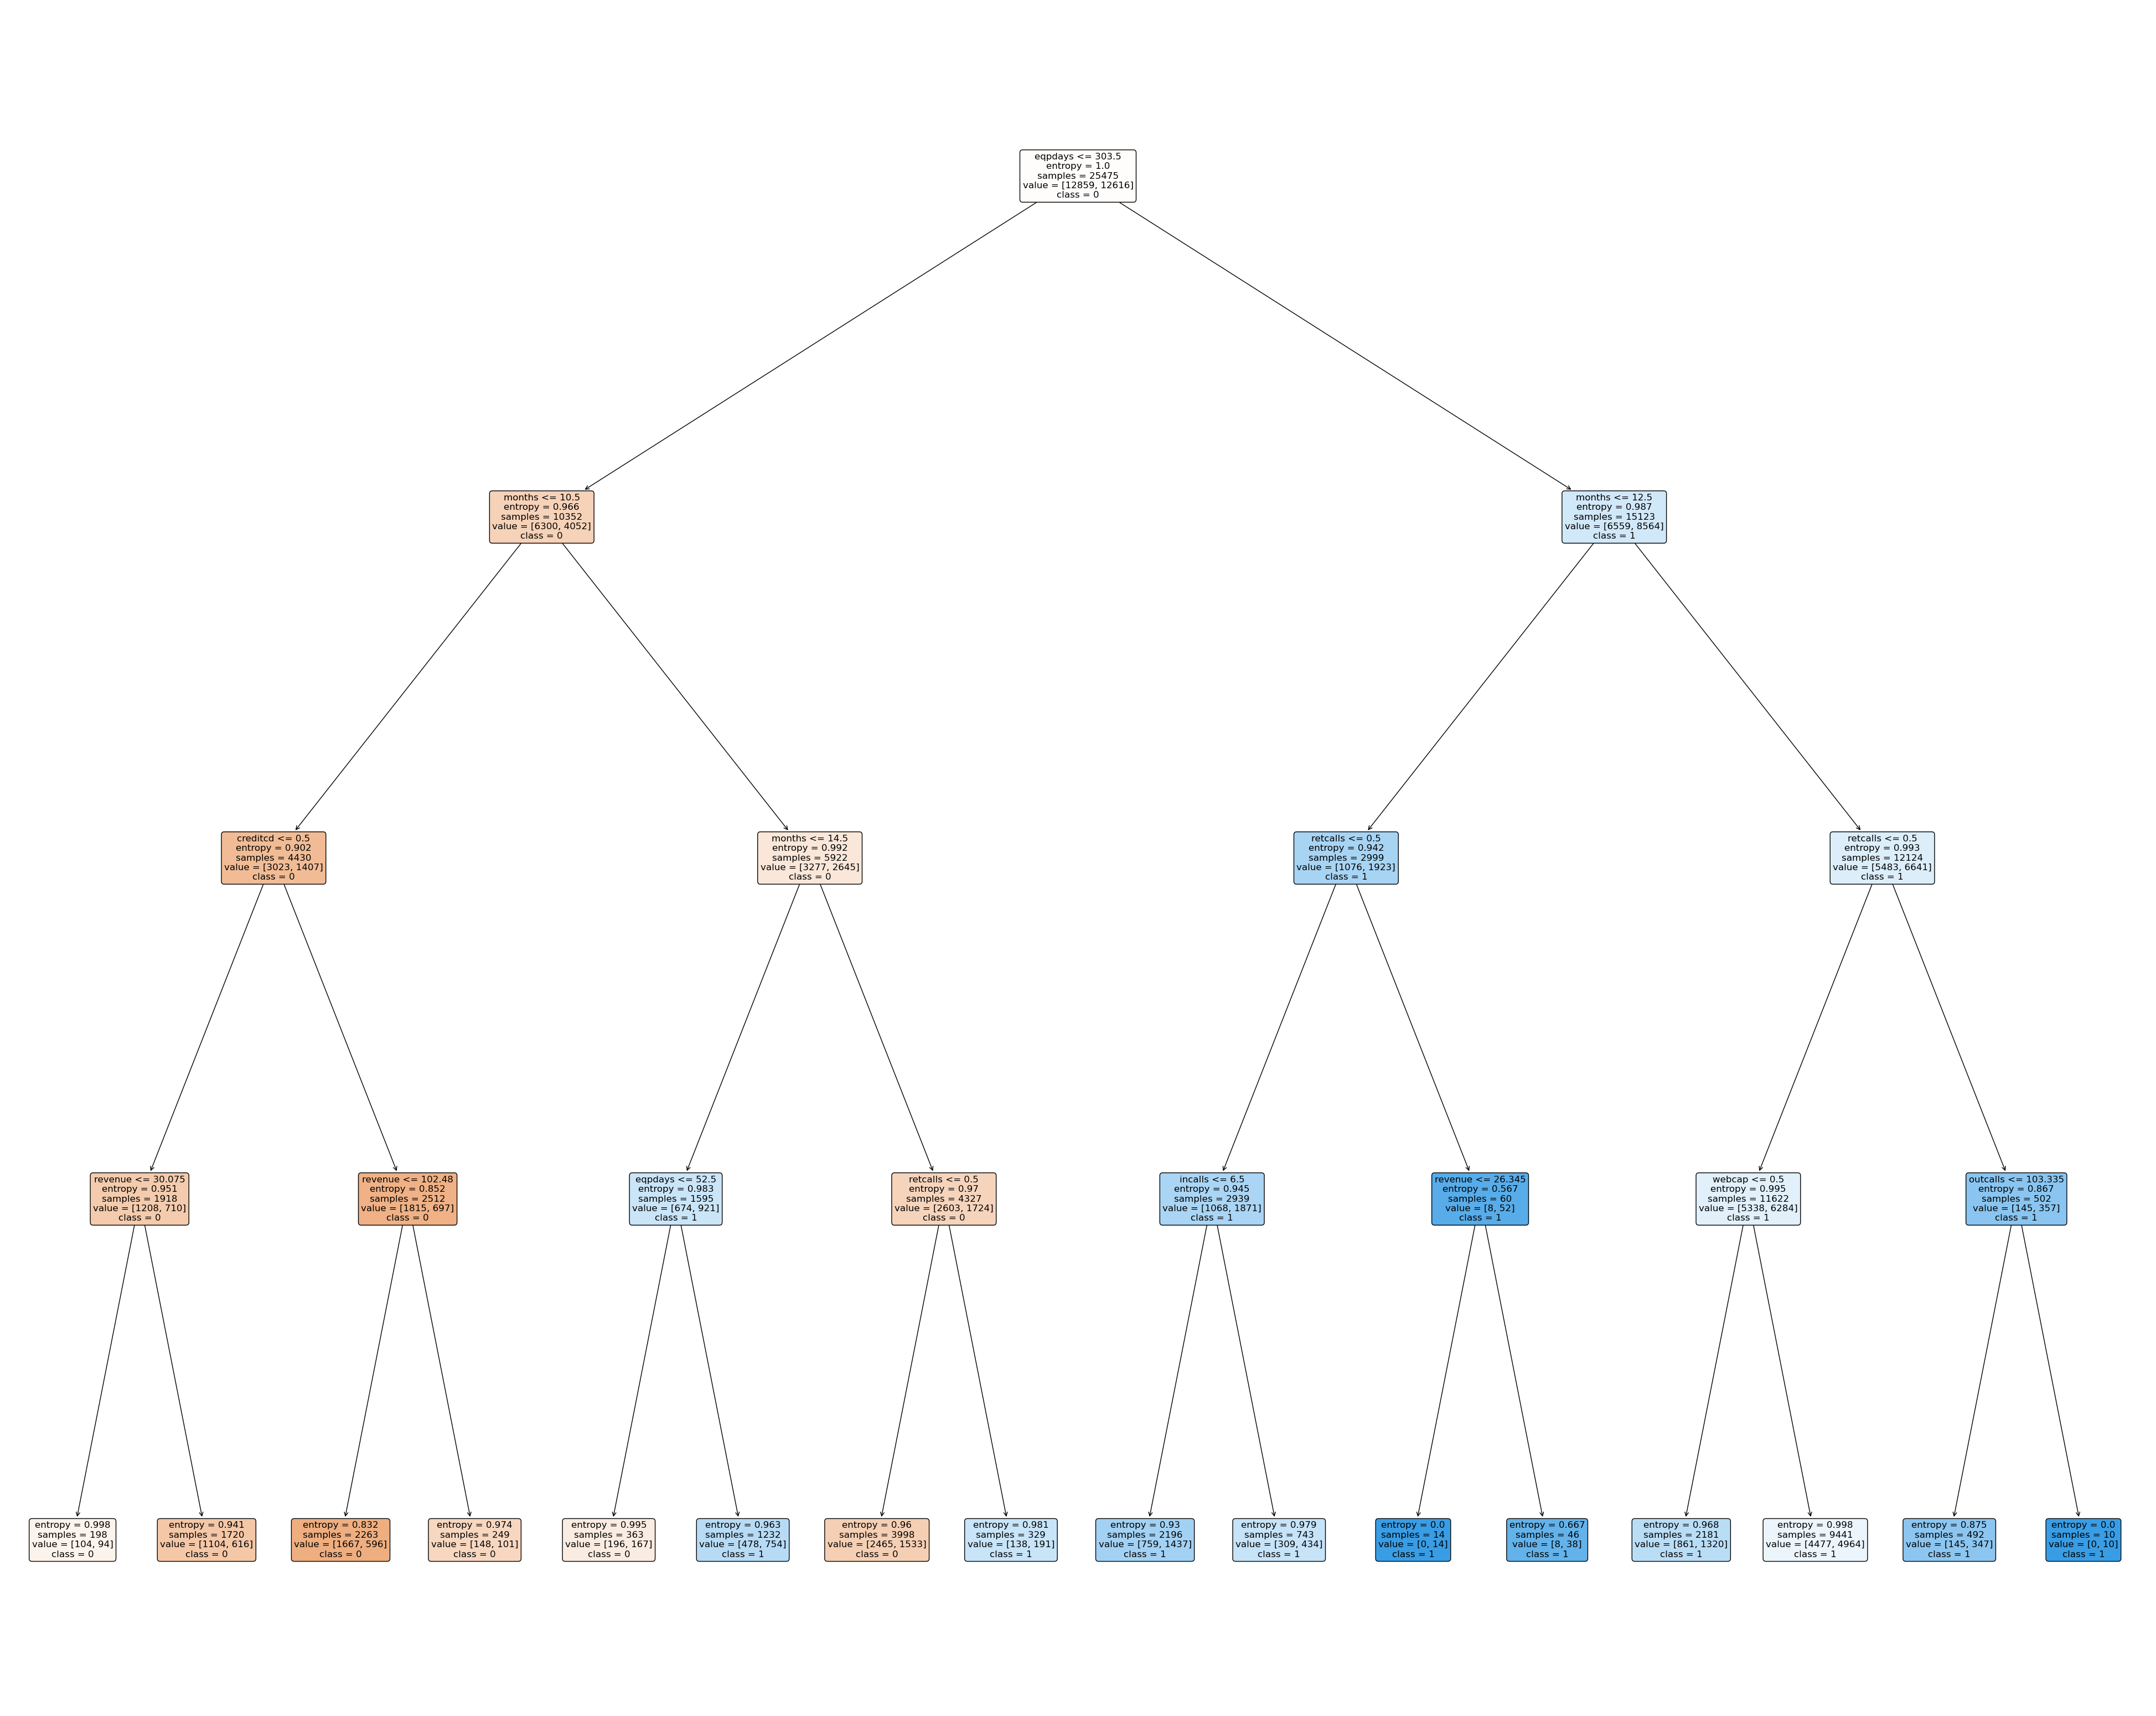

In [13]:
# Part C 
# Test the test_size=0.2,max_depth=4,criterion='entropy' using decision trees visulization

# Initialize classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf2 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)
                                                      
feature_names = X_train.columns.tolist()

plt.figure(figsize=(50,40))                       
tree.plot_tree(clf2.fit(X_train, y_train),         
               feature_names = feature_names, 
               filled = True,                      
                                                      
               class_names=y_train.unique().astype(str).tolist(),
               
               rounded = True,                     
               fontsize=12)                        

plt.show()


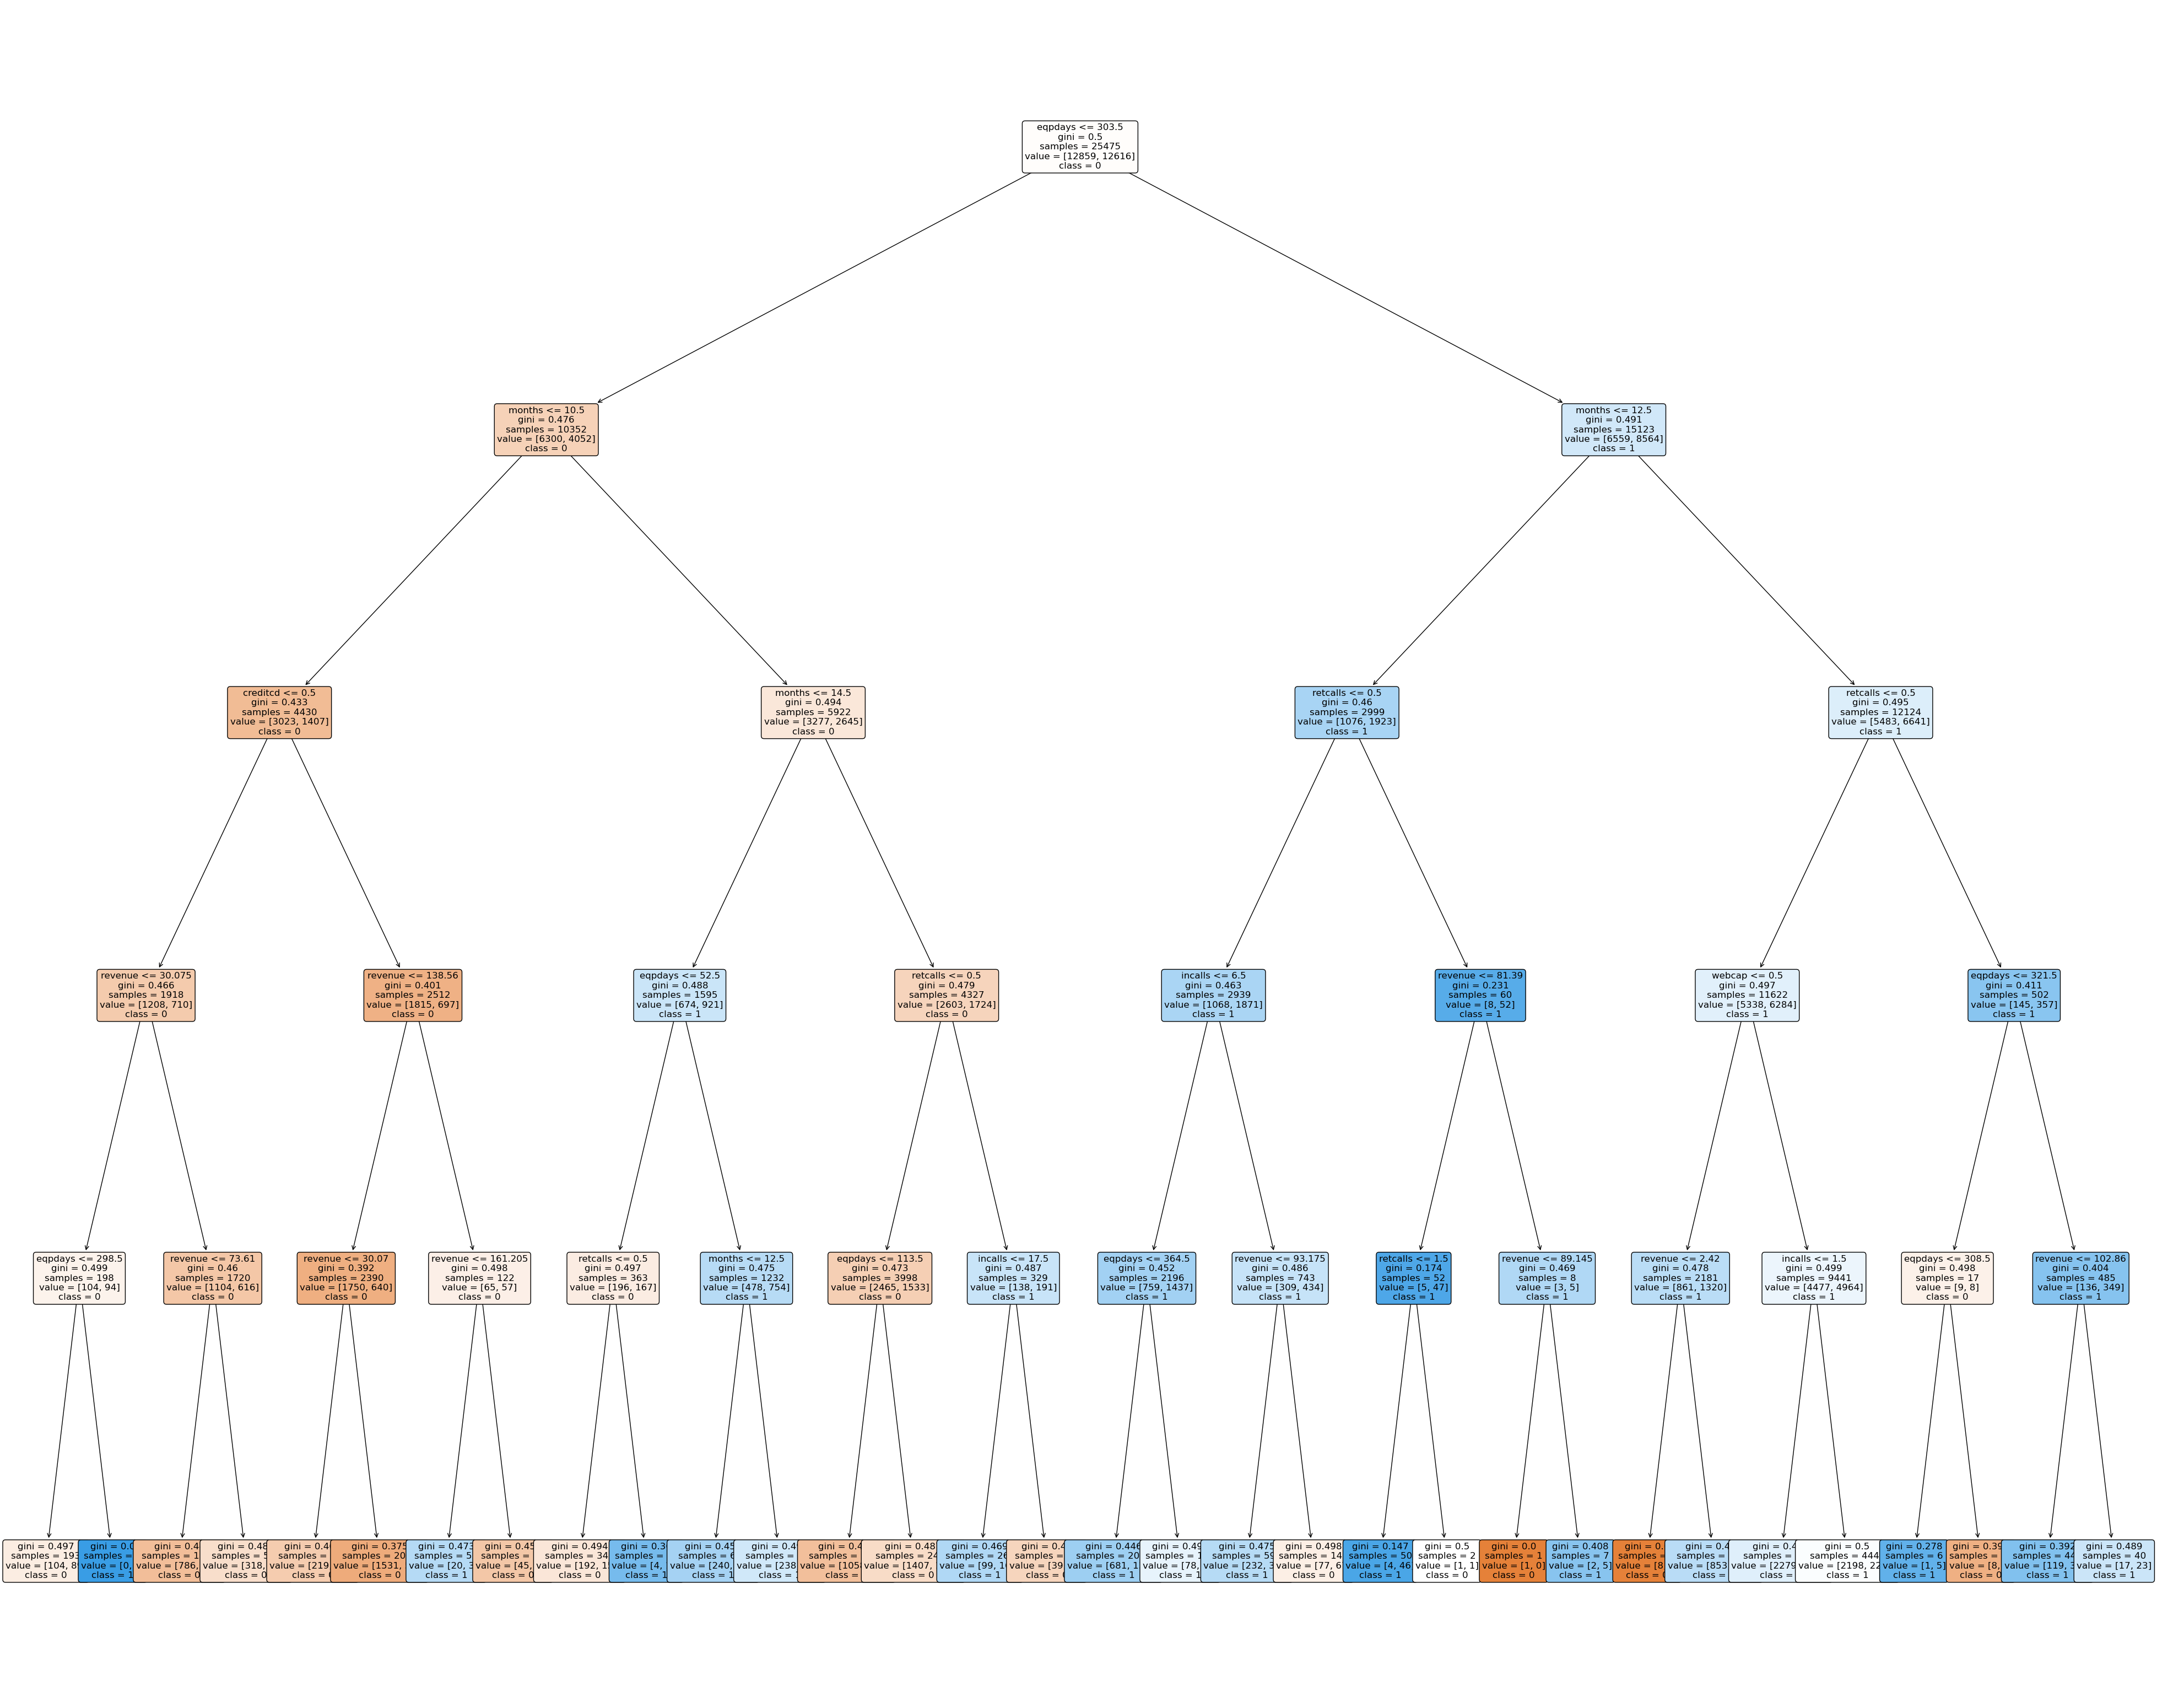

In [14]:
# Test the test_size=0.2,max_depth=5,criterion='gini' using decision trees visulization
# Initialize classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf2 = tree.DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42)
                                                      
feature_names = X_train.columns.tolist()

plt.figure(figsize=(50,40))                       
tree.plot_tree(clf2.fit(X_train, y_train),         
               feature_names = feature_names, 
               filled = True,                      
                                                   
               #class_names = str(y_train.unique()),   
               class_names=y_train.unique().astype(str).tolist(),
               
               rounded = True,                     
               fontsize=12)                        


plt.show()


In [16]:
# Part D 
# Confusion Matrix 
# Split the Data 

X_train, X_test, y_train, y_test = train_test_split(X,        # dataset to be split
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) 
clf3 = DecisionTreeClassifier(criterion='gini',max_depth=5, random_state=42)
clf3 = clf3.fit(X_train, y_train)
y_pred=clf3.predict(X_test)

Confusion matrix, without normalization
[[1390 1757]
 [ 800 2422]]
Normalized confusion matrix
[[0.44 0.56]
 [0.25 0.75]]


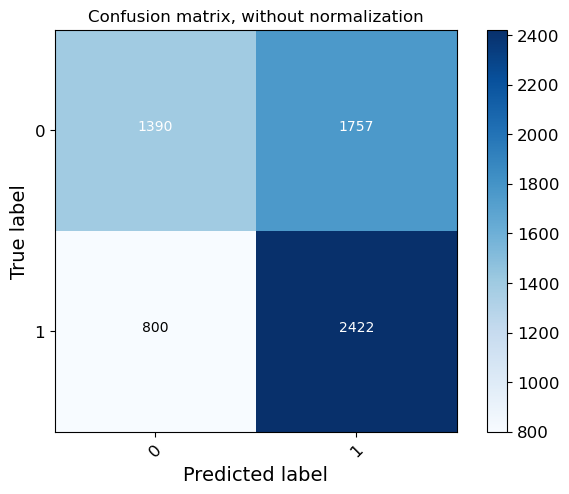

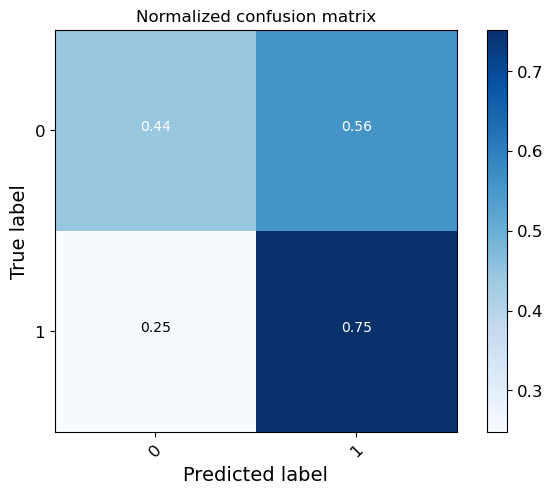

In [17]:
# confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # devide absolute number of observations with sum across columns to get the relative percentage of observations
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)         
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))                 
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'                          
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),                              
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix to evaluate the accuracy of a classification
cnf_matrix = confusion_matrix(y_test, y_pred)
#Determine the way floating point numbers are displayed
np.set_printoptions(precision=2)                             
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=y_train.unique().astype(str).tolist(),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=y_train.unique().astype(str).tolist(),
                      normalize=True,
                      title='Normalized confusion matrix')

plt.show()